In [14]:
import pandas as pd
from rdkit import Chem
from rdkit.ML.Descriptors import MoleculeDescriptors
import numpy as np

In [15]:
df = pd.read_csv("../Data/pm7_wb97xd3_diff.csv", index_col = 0)

In [27]:
idx = df.index

In [17]:
r_smi = df["rsmi"]
p_smi = df["psmi"]
diff_ae = df["ae_diff"]

In [18]:
nms = [x[0] for x in Chem.Descriptors._descList]

In [19]:
mol_r = [Chem.MolFromSmiles(n) for n in r_smi.values]
calc_r = MoleculeDescriptors.MolecularDescriptorCalculator(nms)
desc_matrix_r = np.zeros((len(mol_r), len(nms)))
for i in range(len(mol_r)):
    desc_matrix_r[i,:] = calc_r.CalcDescriptors(mol_r[i])

In [20]:
mol_p = [Chem.MolFromSmiles(n) for n in p_smi.values]
calc_p = MoleculeDescriptors.MolecularDescriptorCalculator(nms)
desc_matrix_p = np.zeros((len(mol_p), len(nms)))
for i in range(len(mol_p)):
    desc_matrix_p[i,:] = calc_p.CalcDescriptors(mol_p[i])

In [21]:
df_r_val = np.hstack((r_smi.values.reshape(len(r_smi.values),1) , desc_matrix_r , diff_ae.values.reshape(len(diff_ae.values),1)))
df_p_val = np.hstack((p_smi.values.reshape(len(p_smi.values),1) , desc_matrix_p , diff_ae.values.reshape(len(diff_ae.values),1)))

In [22]:
col_names_r = np.concatenate((np.array(["Smiles Reactant"]) , np.array(nms) ,  np.array(["diff_ae"])) ,axis = None)
col_names_p = np.concatenate((np.array(["Smiles Product"]) , np.array(nms) , np.array(["diff_ae"])) ,axis = None)

In [29]:
df_r = pd.DataFrame(data = df_r_val, columns = col_names_r , index=idx)
df_p = pd.DataFrame(data = df_p_val, columns = col_names_p , index=idx)

In [30]:
df_r.head()

Smiles Reactant MaxEStateIndex  \
2   [C:1]([O:2][C:3]([C:4]([O:5][H:13])([H:11])[H:...        7.94125   
3   [C:1]([O:2][C:3]([C:4]([O:5][H:13])([H:11])[H:...        7.94125   
6   [C:1]([O:2][C:3]([C:4]([O:5][H:13])([H:11])[H:...        7.94125   
9   [C:1]1([H:7])([H:8])[C@@:2]2([H:9])[C:3]([H:10...        1.58333   
10  [C:1]1([H:7])([H:8])[C@@:2]2([H:9])[C:3]([H:10...        1.58333   

   MinEStateIndex MaxAbsEStateIndex MinAbsEStateIndex       qed   MolWt  \
2        0.121528           7.94125          0.121528  0.485734  76.095   
3        0.121528           7.94125          0.121528  0.485734  76.095   
6        0.121528           7.94125          0.121528  0.485734  76.095   
9         1.18981           1.58333           1.18981  0.417774  82.146   
10        1.18981           1.58333           1.18981  0.417774  82.146   

   HeavyAtomMolWt ExactMolWt NumValenceElectrons  ... fr_sulfonamd fr_sulfone  \
2          68.031    76.0524                  32  ...            0          0   
3          68.031    76.0524                  32  ...            0          0   
6          68.031    76.0524                  32  ...            0          0   
9          72.066    82.0783                  34  ...            0          0   
10         72.066    82.0783                  34  ...            0          0   

   fr_term_acetylene fr_tetrazole fr_thiazole fr_thiocyan fr_thiophene  \
2                  0            0           0           0            0   
3                  0            0           0           0            0   
6                  0            0           0           0            0   
9                  0            0           0           0            0   
10                 0            0           0           0            0   

   fr_unbrch_alkane fr_urea  diff_ae  
2                 0       0  21.7251  
3                 0       0  7.76581  
6                 0       0  26.8581  
9                 0       0  18.6271  
10                0       0  34.7271  

[5 rows x 202 columns]

In [31]:
df_p.head()

Smiles Product MaxEStateIndex  \
2   [C:1]1([H:6])([H:7])[O:2][C:3]([H:9])([H:10])[...        4.72222   
3   [C:1]([O:2][H:13])([H:6])([H:7])[H:8].[C:3]1([...              7   
6   [C:1]([O:2][C:3](=[C:4]([H:11])[H:12])[H:10])(...        4.30556   
9   [C:1](=[C:4]([C:5]([C:6]([C:2](=[C:3]([H:10])[...        3.55042   
10  [C:1]1([H:7])([H:8])[C@:3]2([H:10])[C:2]([H:9]...              5   

   MinEStateIndex MaxAbsEStateIndex MinAbsEStateIndex       qed   MolWt  \
2               0           4.72222                 0  0.386096  76.095   
3               1                 7                 1  0.398992  76.095   
6               0           4.30556                 0   0.40356  76.095   
9         1.05903           3.55042           1.05903  0.361192  82.146   
10        1.03241                 5           1.03241  0.390955  82.146   

   HeavyAtomMolWt ExactMolWt NumValenceElectrons  ... fr_sulfonamd fr_sulfone  \
2          68.031    76.0524                  32  ...            0          0   
3          68.031    76.0524                  32  ...            0          0   
6          68.031    76.0524                  32  ...            0          0   
9          72.066    82.0783                  34  ...            0          0   
10         72.066    82.0783                  34  ...            0          0   

   fr_term_acetylene fr_tetrazole fr_thiazole fr_thiocyan fr_thiophene  \
2                  0            0           0           0            0   
3                  0            0           0           0            0   
6                  0            0           0           0            0   
9                  0            0           0           0            0   
10                 0            0           0           0            0   

   fr_unbrch_alkane fr_urea  diff_ae  
2                 0       0  21.7251  
3                 0       0  7.76581  
6                 0       0  26.8581  
9                 1       0  18.6271  
10                0       0  34.7271  

[5 rows x 202 columns]

In [32]:
cols_to_remove = ["MaxPartialCharge" , "MinPartialCharge" ,"MaxAbsPartialCharge" , "MinAbsPartialCharge" ]
df_r = df_r.drop(cols_to_remove , axis = 1)
df_p = df_p.drop(cols_to_remove , axis = 1)

In [30]:
from rdkit.ML.Descriptors.MoleculeDescriptors import MolecularDescriptorCalculator

In [36]:
summaries = MolecularDescriptorCalculator(nms).GetDescriptorSummaries()

In [37]:
for i,des in enumerate(nms):
    print(des , "EXPLANATION: ->" , summaries[i])

MaxEStateIndex EXPLANATION: -> N/A
MinEStateIndex EXPLANATION: -> N/A
MaxAbsEStateIndex EXPLANATION: -> N/A
MinAbsEStateIndex EXPLANATION: -> N/A
qed EXPLANATION: -> Calculate the weighted sum of ADS mapped properties
MolWt EXPLANATION: -> The average molecular weight of the molecule
HeavyAtomMolWt EXPLANATION: -> The average molecular weight of the molecule ignoring hydrogens
ExactMolWt EXPLANATION: -> The exact molecular weight of the molecule
NumValenceElectrons EXPLANATION: -> The number of valence electrons the molecule has
NumRadicalElectrons EXPLANATION: -> The number of radical electrons the molecule has (says nothing about spin state)
MaxPartialCharge EXPLANATION: -> N/A
MinPartialCharge EXPLANATION: -> N/A
MaxAbsPartialCharge EXPLANATION: -> N/A
MinAbsPartialCharge EXPLANATION: -> N/A
FpDensityMorgan1 EXPLANATION: -> N/A
FpDensityMorgan2 EXPLANATION: -> N/A
FpDensityMorgan3 EXPLANATION: -> N/A
BalabanJ EXPLANATION: -> Calculate Balaban's J value for a molecule
BertzCT EXPLANA

In [33]:
df_p.to_csv("../Data/products_descriptors.csv")
df_r.to_csv("../Data/reactants_descriptors.csv")

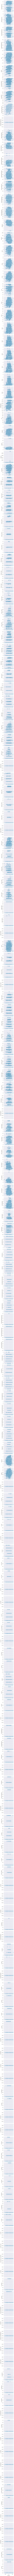

In [50]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("darkgrid")
g = sns.pairplot(df_r , y_vars=np.array(nms), x_vars=["diff_ae"])

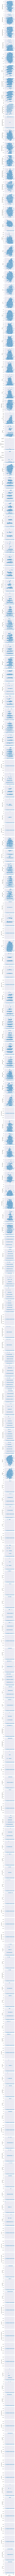

In [51]:
g = sns.pairplot(df_p , y_vars=np.array(nms), x_vars=["diff_ae"])

In [160]:
X_r = df_r.drop(["Smiles Reactant" , "diff_ae"] , axis = 1)
X_p = df_p.drop(["Smiles Product" , "diff_ae"] , axis = 1)
Y = df_r["diff_ae"]

In [161]:
from sklearn.preprocessing import MinMaxScaler
X_r = X_r.values.astype("float64")
X_p = X_p.values.astype("float64")
Y = Y.values.astype("float64")
scaler = MinMaxScaler()
scaler.fit(X_r)
X_r = scaler.transform(X_r)
scaler = MinMaxScaler()
scaler.fit(X_p)
X_p = scaler.transform(X_p)

In [162]:
def shuffle(X_r , X_p,y, perc):
    n = len(Y)
    idx = np.arange(n)
    new_idx = np.random.shuffle(idx)
    X_train_r = X_r[:int(len(X_r)*perc)]
    X_test_r = X_r[int(len(X_r)*perc):]
    X_train_p = X_p[:int(len(X_p)*perc):]
    X_test_p = X_p[int(len(X_p)*perc):]
    y_train = y[:int(len(y)*perc)]
    y_test = y[int(len(y)*perc):]
    return X_train_r, X_train_p , X_test_r , X_test_p, y_train, y_test

In [163]:
X_train_r , X_train_p , X_test_r , X_test_p , y_train, y_test = shuffle(X_r, X_p , Y , 0.80)

In [186]:
import tensorflow as tf
from tensorflow.keras import layers,Sequential
import keras 
def merged_model(shape_r , shape_p):
    r_inp = keras.Input(shape=shape_r)
    p_inp = keras.Input(shape=shape_p)
    
    r = Sequential()
    r.add(layers.Dense(32,input_shape = shape_r ,activation="linear"))
    r.add(layers.Dense(32 ,activation="linear"))
    
    r.add(layers.Dense(64,activation="relu"))
    r.add(layers.Dense(64,activation="relu"))
    r.add(layers.Dense(32,activation="relu"))
    r.add(layers.Dense(32,activation="relu"))
    r.add(layers.Dense(16,activation="relu"))
    r.add(layers.Dense(16,activation="relu"))
    
    r.add(layers.Dense(8,activation="relu"))
    r.add(layers.Dense(8,activation="relu"))
    
    p = Sequential()
    p.add(layers.Dense(32,input_shape = shape_p,activation="linear"))
    p.add(layers.Dense(32 ,activation="linear"))
    
    p.add(layers.Dense(64,activation="relu"))
    p.add(layers.Dense(64,activation="relu")) 
    p.add(layers.Dense(32,activation="relu"))
    p.add(layers.Dense(32,activation="relu"))
    p.add(layers.Dense(16,activation="relu"))
    p.add(layers.Dense(16,activation="relu"))
    
    p.add(layers.Dense(8,activation="relu"))
    p.add(layers.Dense(8,activation="relu"))
    
    
    
    r_out = r(r_inp)
    p_out = p(p_inp)
    merged = keras.layers.concatenate([r_out , p_out])
    
    hybrid = Sequential()
    hybrid.add(layers.Dense(16, activation="linear"))
    hybrid.add(layers.Dense(16 , activation="linear"))
    hybrid.add(layers.Dense(32, activation="linear"))
    hybrid.add(layers.Dense(32 , activation="linear"))
    hybrid.add(layers.Dense(64, activation="relu"))
    hybrid.add(layers.Dense(64 , activation="relu"))
    hybrid.add(layers.Dense(16, activation="relu"))
    hybrid.add(layers.Dense(16 , activation="relu"))
    hybrid.add(layers.Dense(8 , activation = "relu"))
    hybrid.add(layers.Dense(8 , activation = "relu"))
    hybrid.add(layers.Dense(4 , activation="relu"))
    hybrid.add(layers.Dense(4 , activation="relu"))
    hybrid.add(layers.Dense(2 , activation="relu"))
    hybrid.add(layers.Dense(2 , activation="relu"))
    hybrid.add(layers.Dense(1 , activation="linear"))
    output = hybrid(merged)
    model = keras.Model(inputs=[r_inp, p_inp], outputs=output)
    optimizer = tf.keras.optimizers.Adam(learning_rate=0.0001)
    model.compile(loss='mse',
                optimizer=optimizer,
                metrics=['mse' , 'mae', 'mean_squared_logarithmic_error'])
    return model

In [187]:
mod = merged_model(X_train_r.shape , X_train_p.shape)

In [166]:
import livelossplot

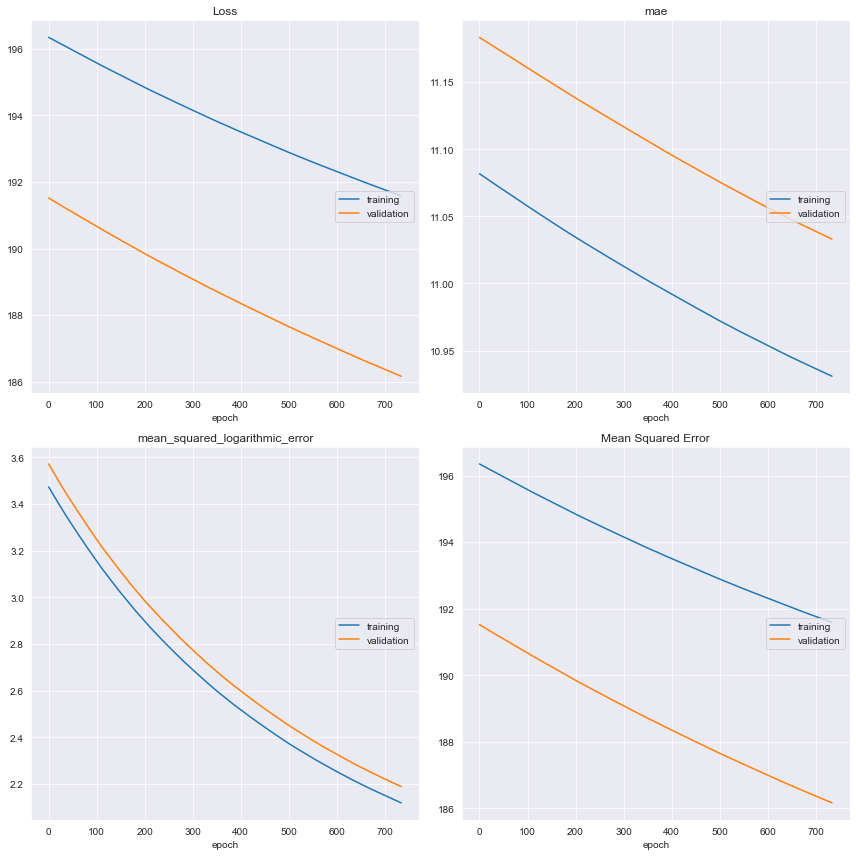

Loss
	training         	 (min:  191.587, max:  196.347, cur:  191.587)
	validation       	 (min:  186.166, max:  191.520, cur:  186.166)
mae
	training         	 (min:   10.931, max:   11.082, cur:   10.931)
	validation       	 (min:   11.033, max:   11.183, cur:   11.033)
mean_squared_logarithmic_error
	training         	 (min:    2.119, max:    3.474, cur:    2.119)
	validation       	 (min:    2.189, max:    3.572, cur:    2.189)
Mean Squared Error
	training         	 (min:  191.587, max:  196.347, cur:  191.587)
	validation       	 (min:  186.166, max:  191.520, cur:  186.166)
14/14 [==============================] - 1s 82ms/step - loss: 191.5875 - mse: 191.5875 - mae: 10.9309 - mean_squared_logarithmic_error: 2.1188 - val_loss: 186.1656 - val_mse: 186.1656 - val_mae: 11.0331 - val_mean_squared_logarithmic_error: 2.1888
Epoch 736/1024
 1/14 [=>............................] - ETA: 0s - loss: 173.6502 - mse: 173.6502 - mae: 10.3453 - mean_squared_logarithmic_error: 1.8901

In [ ]:
plot_losses = livelossplot.PlotLossesKeras()
mod.fit([X_train_r,X_train_p], y_train,
          batch_size=512,
          epochs=1024,
          verbose=1,callbacks=[plot_losses],
          validation_data=([X_test_r, X_test_p], y_test))

Text(0, 0.5, 'Predictions')

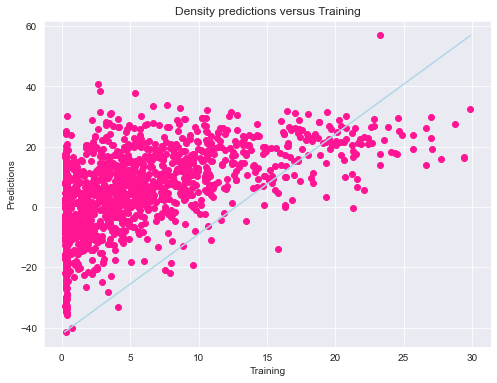

In [179]:
y_pred = mod.predict([X_test_r,X_test_p])
fig, ax = plt.subplots()
plt.rcParams["figure.figsize"] = (8, 6)
ax.plot(y_pred , y_test , 'o' , color = "deeppink")
ax.plot((np.min(y_pred) , np.max(y_pred)), (np.min(y_test) , np.max(y_test) ) , color = "lightblue")
plt.xlabel("Training")
plt.title("Density predictions versus Training")
plt.ylabel("Predictions")

In [180]:
for l in y_pred:
    print(l)

[0.2934783]
[0.31115347]
[5.6462846]
[7.88208]
[0.29761022]
[2.5452409]
[7.503885]
[3.6133022]
[0.3045061]
[0.31120002]
[4.271829]
[5.3914394]
[1.7917689]
[6.837978]
[0.42121446]
[0.29847643]
[1.2219036]
[0.29371876]
[3.956824]
[0.48123062]
[4.5008574]
[0.28737205]
[0.6205378]
[4.4351144]
[10.506353]
[10.734765]
[9.010303]
[2.8053823]
[2.1043198]
[8.886487]
[0.31184602]
[0.20347276]
[0.29029268]
[0.27381125]
[9.358479]
[0.28698844]
[0.28307807]
[0.2827316]
[1.0856452]
[3.81462]
[0.28354827]
[0.6387505]
[4.5122285]
[0.29846495]
[0.20490257]
[0.27855298]
[4.3729734]
[11.403552]
[3.9665446]
[0.2768349]
[5.3446894]
[0.28029943]
[0.39305896]
[3.836658]
[8.345927]
[0.46970463]
[0.3162065]
[0.22889003]
[0.33620173]
[1.7301464]
[0.31631738]
[11.867883]
[0.68147147]
[8.519389]
[1.2570003]
[10.614958]
[7.282429]
[0.97663885]
[11.4011]
[4.655325]
[6.425374]
[4.2670617]
[2.5830832]
[11.983928]
[0.31523353]
[5.6696296]
[0.29296362]
[4.7145953]
[7.184247]
[1.9986373]
[7.7697086]
[0.2903421]
[0.30409

[3.719877]
[13.3491335]
[1.2204702]
[11.924703]
[10.216209]
[3.0141873]
[20.1208]
[3.5321357]
[19.741365]
[1.9030179]
[21.480642]
[7.6445208]
[3.2988312]
[1.2665523]
[0.5588649]
[0.2829822]
[5.2339005]
[7.4275603]
[0.2529391]
[0.29244262]
[5.034352]
[5.4005055]
[20.26686]
[1.4717215]
[0.28319326]
[18.53033]
[5.9526014]
[24.62165]
[22.371332]
[0.3308832]
[0.30746064]
[0.3787812]
[12.255156]
[0.28707364]
[16.962652]
[2.767718]
[11.150882]
[0.30490205]
[8.89249]
[0.30926073]
[2.9434528]
[0.37662405]
[0.32057482]
[1.1336191]
[0.9118239]
[10.497283]
[4.7012854]
[14.423407]
[3.9713142]
[10.646956]
[12.804811]
[10.25905]
[6.9865456]
[3.128077]
[0.28329855]
[9.209471]
[2.2111456]
[17.292408]
[0.25894868]
[19.35228]
[1.0587608]
[0.290255]
[17.57595]
[7.6867523]
[0.27267838]
[0.27502352]
[0.29256526]
[0.27623188]
[0.22013363]
[0.2815889]
[5.8543334]
[3.3748083]
[0.27015468]
[0.28528202]
[3.54652]
[4.8213234]
[14.297162]
[6.5901904]
[1.7442461]
[1.1717305]
[3.7923934]
[3.0032678]
[7.1430726]
[0.5

In [181]:
y_test

array([-10.07901486,   9.4821803 ,  -8.87800143, ..., -12.99775968,
        18.53497745, -10.66861554])